In [1]:
%matplotlib notebook

import pandas as pd 
import matplotlib.pyplot as plt
from textwrap import wrap
import numpy as np

files = ["fc_18_0", "fc_18_1", "fcio_18_0", "fcio_18_1",
        "wn_18_0", "wn_18_1","wnio_18_0", "wnio_18_1",
        "mpi_N2_18_0","mpi_N2_18_1", "mpi_N4_18_0","mpi_N4_18_1",
        "mpi_N2_18_1-nf", "mpi_N4_18_1-nf", "fcio_18_1-nf", "wnio_18_1-nf",
        "fc_18_1-nf", "wn_18_1-nf"]
head = ('elem', 'n', 'pN', 'min_e', 'max_e', 'avg_e', 'size', 'nerror', 'l2_error')
# headmax = ('elem', 'n', 'pN', 'min_e', 'max_e', 'avg_e', 'size', 'nerror', 'l2_error')

headmain = ("elements",
        "fc_18_0", "fc_18_1", "fcio_18_0", "fcio_18_1",
        "wn_18_0", "wn_18_1","wnio_18_0", "wnio_18_1",
        "mpi_N2_18_0","mpi_N2_18_1", "mpi_N4_18_0","mpi_N4_18_1")
dataraw = pd.DataFrame(columns=headmain)
datafile = pd.read_csv('final_consolidated.csv'
                        , delimiter=',',
                          names=headmain, skiprows=1)
dataraw['elements'] = datafile['elements']
# print(data)
for file in files:
    filename = 'final_'+file+'.csv'
#     print(filename)
    datafile = pd.read_csv(filename, delimiter=',',
                          names=head, skiprows=1)
    dataraw[file+'_min'] = datafile['min_e']
    dataraw[file+'_max'] = datafile['max_e']
    dataraw[file] = datafile['avg_e']

# data

dataraw = dataraw.sort_values(by=['elements'])
data_1k = dataraw[0:30]
data_2k = dataraw[30:60]
data_5k = dataraw[60:90]
data_10k = dataraw[90:120]
data_20k = dataraw[120:150]
data_50k = dataraw[150:180]
data_100k = dataraw[180:210]
data_200k = dataraw[210:240]

data = pd.DataFrame(columns=dataraw.columns)
data.loc['1k'] = data_1k.mean()
data.loc['2k'] = data_2k.mean()
data.loc['5k'] = data_5k.mean()
data.loc['10k'] = data_10k.mean()
data.loc['20k'] = data_20k.mean()
data.loc['50k'] = data_50k.mean()
data.loc['100k'] = data_100k.mean()
data.loc['200k'] = data_200k.mean()

for file in files:
    data[file+'_min'] = data[file] - data[file+'_min']
    data[file+'_max'] = data[file+'_max'] - data[file]


# data['fc_mpi_N4_18_1'] = data['mpi_N4_18_1']/ data['fc_18_1']
# data['fc_mpi_N4_18_0'] = data['mpi_N4_18_0']/data['fc_18_0']

# data['fcio_mpi_N4_18_1'] = data['mpi_N4_18_1'] / data['fcio_18_1']
# data['fcio_mpi_N4_18_0'] = data['mpi_N4_18_0'] / data['fcio_18_0']

# data['wn_mpi_N2_18_1'] = data['mpi_N2_18_1'] / data['wn_18_1']
# data['wn_mpi_N2_18_0'] = data['mpi_N2_18_0'] / data['wn_18_0']

# data['wnio_mpi_N2_18_1'] = data['mpi_N2_18_1'] / data['wnio_18_1']
# data['wnio_mpi_N2_18_0'] = data['mpi_N2_18_0'] / data['wnio_18_0']
data = data.reset_index()
data

def add_annotation(ax, data, name):
    count = 0
    for index, entry in data.iterrows():
    
        if entry[name] > 1.0:
            ax.annotate("{:.2f}".format(entry[name]), xy=(count,entry[name]), color='green',
                              textcoords='offset points', xytext=(-4,4))
        else:
            ax.annotate("{:.2f}".format(entry[name]), xy=(count, entry[name]), color='red',
                              textcoords='offset points', xytext=(-4,4))
        count = count+1
def plot_data(ax, data1, data2, yerr):
    data1.plot(x='elements', kind='bar', rot = 0, ax=ax, yerr = yerr, capsize=4)
    ax2 = ax.twinx()
    data2.plot(x='index', linestyle='-', marker='o', color='c', ax = ax2)
    return ax2
    # print(data1[['elem','per_opt_mpi']])

def plot_speedupdata(ax, data, linestyle='-', color='c'):
    data.plot(x='index', linestyle=linestyle, marker='o', color=color, ax = ax)
    
    
def plot_comparison(designs, nrows=0, ncols=1, savename=None):
    figk_ax2 = []
    if nrows==0:
        nrows = len(designs)
    figk_fig, figk_ax  = plt.subplots(ncols=ncols, nrows=nrows, figsize=(6,6), tight_layout=True)
    current = 0
    design1 = None
    design2 = None
    for d1, d2, vstr in designs:
        data[d2+'_'+d1+'_'+vstr] = data[d1+'_'+vstr]/ data[d2+'_'+vstr]
        print(d1, d2, vstr)
        design1 = d1
        design2 = d2
        err = data[[d1+'_'+vstr+'_min',d1+'_'+vstr+'_max', d1+'_'+vstr+'_min',d1+'_'+vstr+'_max']].T.values
        ax2 = plot_data(figk_ax[current], data[['elements', d1+'_'+vstr, d2+'_'+vstr]], data[['index',d2+'_'+d1+'_'+vstr]],
                        err)
        figk_ax2.append(ax2)
        add_annotation(ax2, data[['index',d2+'_'+d1+'_'+vstr]], d2+'_'+d1+'_'+vstr)
        figk_ax[current].set_title("\n".join(wrap(vstr, 60)))
        current = current+1

    for (ax, ax2) in zip(figk_ax,figk_ax2) :
        ax.set_xlabel('Mesh Elements')
        ax.set_ylabel('Time (in secs)')

        ax2.set_ylabel('Speedup', color='c')
        ax2.get_legend().remove()
        h1, l1 = ax.get_legend_handles_labels()
        h2, l2 = ax2.get_legend_handles_labels()
        ax.legend(h1+h2, [design1, design2, 'Speedup'])
    if savename == None:
        savename =d2+'_'+d1
    
    print('Saving file in '+str(savename))
    figk_fig.savefig(str(savename)+'.pgf')
    figk_fig.savefig(str(savename)+'.pdf')

def plot_speedup(designs, colors, lines, savename=None, a=True):
    figk_ax2 = []
    figk_fig, figk_ax  = plt.subplots(figsize=(6,5), tight_layout=True)
    current = 0
    design1 = None
    design2 = None
    for d1, d2, vstr in designs:
        data[d2+'_'+d1+'_'+vstr] = data[d1+'_'+vstr]/ data[d2+'_'+vstr]
        print(d1, d2, vstr)
        design1 = d1
        design2 = d2
#         err = data[[d1+'_'+vstr+'_min',d1+'_'+vstr+'_max', d1+'_'+vstr+'_min',d1+'_'+vstr+'_max']].T.values
#         ax2 = plot_data(figk_ax[current], data[['elements', d1+'_'+vstr, d2+'_'+vstr]], data[['index',d2+'_'+d1+'_'+vstr]],
#                         err)
        plot_speedupdata(figk_ax, data[['index',d2+'_'+d1+'_'+vstr]], lines[current], colors[current])
#         figk_ax2.append(ax2)
        if a:
            add_annotation(figk_ax, data[['index',d2+'_'+d1+'_'+vstr]], d2+'_'+d1+'_'+vstr)
        figk_ax.set_title("\n".join(wrap(vstr, 60)))
        current = current+1

    figk_ax.set_ylabel('Speedup', color='c')
#         figk_ax.get_legend().remove()
#         h1, l1 = ax.get_legend_handles_labels()
#         h2, l2 = ax2.get_legend_handles_labels()
#         ax.legend(h1+h2, [design1, design2, 'Speedup'])
    figk_ax.legend()
    if savename == None:
        savename =d2+'_'+d1
    
    print('Saving file in '+str(savename))
    figk_fig.savefig(str(savename)+'.pgf')
    figk_fig.savefig(str(savename)+'.pdf')

<IPython.core.display.Javascript object>


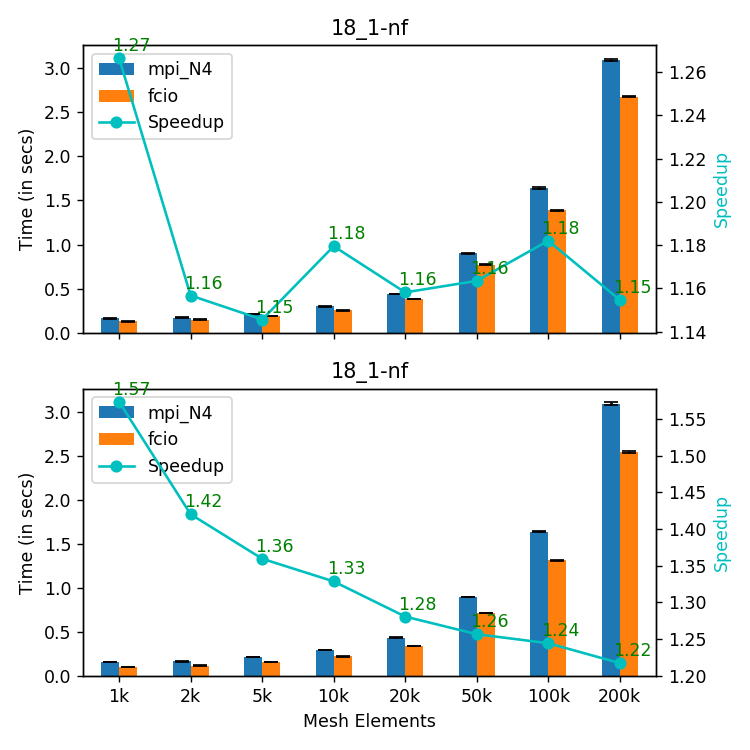

mpi_N4 fc 18_1-nf
mpi_N4 fcio 18_1-nf
Saving file in fc_mpi_N4_nf


In [2]:
############################################
# MPI with 4 rings vs FPGA ONLY Fully connected No flag
############################################


designs = [['mpi_N4', 'fc', '18_1-nf'], ['mpi_N4', 'fcio', '18_1-nf']]

plot_comparison(designs, savename='fc_mpi_N4_nf')

<IPython.core.display.Javascript object>


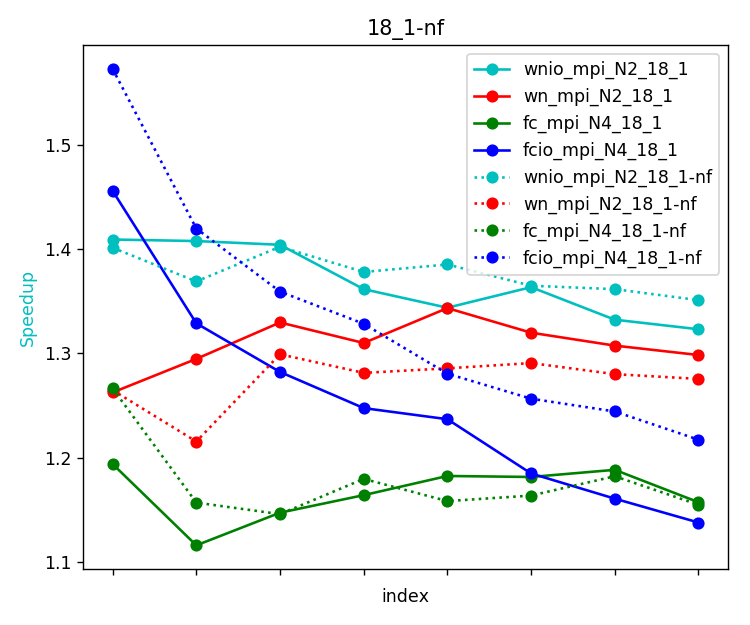

mpi_N2 wnio 18_1
mpi_N2 wn 18_1
mpi_N4 fc 18_1
mpi_N4 fcio 18_1
mpi_N2 wnio 18_1-nf
mpi_N2 wn 18_1-nf
mpi_N4 fc 18_1-nf
mpi_N4 fcio 18_1-nf
Saving file in speedupcomall_18_1-nf


<IPython.core.display.Javascript object>


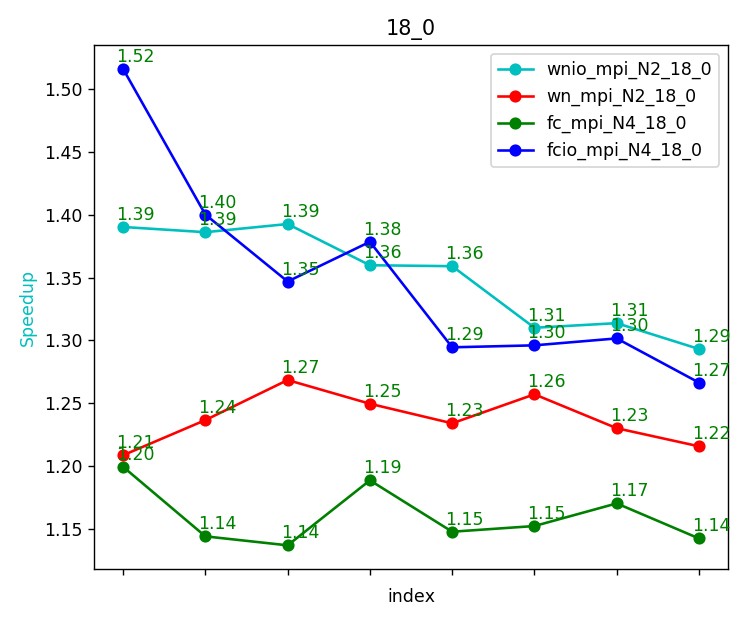

mpi_N2 wnio 18_0
mpi_N2 wn 18_0
mpi_N4 fc 18_0
mpi_N4 fcio 18_0
Saving file in speedupcomall_18_0


In [3]:
############################################
# MPI with 4 rings vs FPGA ONLY Fully connected No flar
############################################


designs = [['mpi_N2', 'wnio', '18_1'], ['mpi_N2', 'wn', '18_1'], ['mpi_N4', 'fc', '18_1'], ['mpi_N4', 'fcio', '18_1'], ['mpi_N2', 'wnio', '18_1-nf'], ['mpi_N2', 'wn', '18_1-nf'], ['mpi_N4', 'fc', '18_1-nf'], ['mpi_N4', 'fcio', '18_1-nf']]
colors = ['c','r','g','b', 'c','r','g','b']
lines = ['-','-','-','-', ':',':',':',':']
plot_speedup(designs, colors, lines, savename='speedupcomall_18_1-nf', a=False)

designs = [['mpi_N2', 'wnio', '18_0'], ['mpi_N2', 'wn', '18_0'], ['mpi_N4', 'fc', '18_0'], ['mpi_N4', 'fcio', '18_0']]
colors = ['c','r','g','b']
lines = ['-','-','-','-', ':',':',':',':']
plot_speedup(designs, colors,lines, savename='speedupcomall_18_0')